# Predicting Boston Housing Prices

## Getting Started

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics

- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13



1. The intution on effect of 'RM' (Average number of rooms) on 'MEDV' (price of a house) should be straight forward. As the number of rooms increases, the cost of the house definitely increases irrespective of locality.This is primarily because the construction cost of a house increases linearly with number of rooms.

2. As 'LSTAT' stands for value of percentage of lower class people, we can infer that, with the increase of LSTAT value 'MEDV' could decrease. Because, it is highly likely that lower class workers reside in less affordable neighbourhood.

3. Apparently, 'PTRATIO' is relatively hard to adjudge or infer. However, we can infer that less the ratio of student to teacher, it is highly likely that there are multiple schools near by and parents consider sending their children to near by schools.

----

## Developing a Model


### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=5)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


----

## Analyzing Model Performance


### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

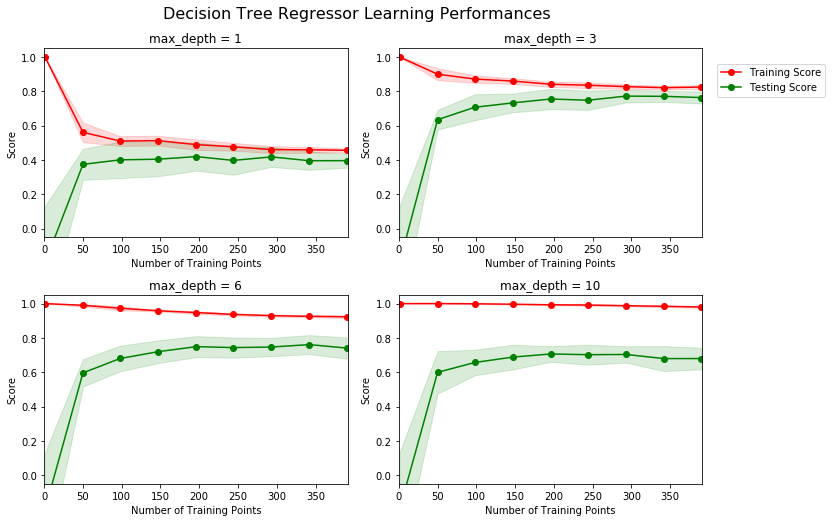

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)



1. From the graphs above the maximum depth of the model is convincingly 3. However, it would be interesting to see how the learning curve woyuld be for depth 4 and 5.

2. The convergence of training and testing score curves seem to have already occured at around 300.The two curves are running parallel to x-axis already and, I assume adding few more points or any number of points wouldn't change the pattern of the training and testing curves.

3. Model 3 starts converging at about 300 training points,which states that adding more points would definitely don't benefit the model.Interestingly,training curve for the model has a gradual decreasing curve and being constant about 200 points,testing curve has been increasing with higher slope until 50 points and then being gradual there after.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  


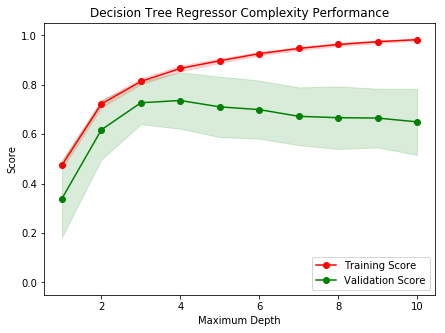

In [7]:
vs.ModelComplexity(X_train, y_train)


1. When the model is trained with maximum depth of 1, it does suffer with high bias (underfitting). We can clearly see from the graph that training and validation scores are running at similar variance but has relatively low score.

2. When the model is trained at depth 10, it has the highest variance between the two scores which certainly implies that this model suffers from overfitting problem. We can clearly see training and validation score curves are running far apart which implies it has higher variance tradeoff.



Depth 3 looks to have generalized the unseen data pretty well.

Model Complexity graph leads to an intution that decision tree with maximum 3 fits the model best. The Training and Validation score has been increasing at similar variation until the depth 3. This signifies, the model under depth 3 are underfitted. However, the variation starts increasing slightly from depth 3 and completely from depth 4 which signifies the overfitting would definitely occur post depth 4 and slight possible chance for depth 4 too.

-----

## Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Implementation: Fitting a Model


In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

*What maximum depth does the optimal model have?*

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


Upon optimizing using grid search, the best model to choose is with maximum depth as 4. However, our premiliminary studies from the learning curves and complexity curves suggested a model about maximum depth 3.

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,931.58
Predicted selling price for Client 2's home: $235,620.00
Predicted selling price for Client 3's home: $922,740.00


From the statistics calculated from Data Exploration we have:-

Minimum price: $105,000.00

Maximum price: $1,024,800.00

Mean price: $454,342.94

Median price $438,900.00

Standard deviation of prices: $165,171.13

I would recommend each client to sell his/her house at the predicted prices from the model obtained with possible given explaination:-

1. Client 1's home is priced reasonably at $411,931.58 which is quite closer to the mean or median of Boston Housing. It also falls in the region of 1 standard deviation away from the mean. Considering the number of rooms, relatively less neighbourhood poverty level and better student-teacher ratio would bolster this selling price prediction.

2. Client 2's home is small sized which directly effects the price and relatively higher poverty level in the neighbourhood and not a better student-teacher ratio would definitely decrease the seling price of the house. From the algorithm, we have predicted the price would be around $235,620.00 which makes a lot of sense that is 1 standard deviation away from the minimum price.

3. Client 3's home is pretty large with more number of rooms and is in a pretty good locality with less poverty level and pretty decent schools around.The predicted price from the algorithm is $922,740.00 which is quite believable and is much closer the maximum price from the earlier statistics.

It would be interesting to study to draw and 95% or 99% confidence interval for these predictions and provide it for the clients.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 



In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61




1. Considering 1978 data in today's scenario is similart to considering a sample from different population. However, the provided parameters are also effective in today's scenario.Inflation is also an important parameter to consider. I would consider a time series model along with an inflation rate for a robust model.

2. As I mentioned earlier, the factors to model in the current scenario aren't sufficient enough.Some of the factors to consider are public transportation availability, Tech Companies aroud, sqaure feet of the plot area.

3. The Model is definitely not robust enough to make consistent predictions as it considers only three factors. Fitting this model in the real-world scenario would underfit the training data and the predicted price would float at high variance when compared with the expected Model.

4. This data is pretty much localized. Means it is neither applicable to rural area nor to any other Urban city.

5. We can do a probability distribution considering characteristics of entire neighbourhood and the price of an individual house.This would definitely provide a right job in understanding how likely it is to consider characteristic of entire neighbourhood.